<a href="https://colab.research.google.com/github/Yashmvala/MyProjects/blob/main/House_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Overview**

Build a machine learning model to predict house prices using linear regression, then deploy it as a web app using Streamlit. This is great for GitHub and LinkedIn because it combines ML + Data Viz + Web deployment.

## **Tools & Technologies**

Python

Scikit-learn

Pandas, NumPy, Matplotlib, Seaborn

## DataSet :- https://www.kaggle.com/datasets/camnugent/california-housing-prices

## **Importing Libraries**

In [154]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## **Loading Data**

In [155]:
house_price =pd.read_csv('housing.csv')
house_price.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## **Data Processing**

In [156]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [157]:
house_price.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [160]:
house_price['total_bedrooms'] = house_price['total_bedrooms'].median()

## **Splitting Data**

In [162]:
X = house_price[['median_income', 'housing_median_age', 'total_rooms','latitude','total_bedrooms','population']]
y = house_price['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Model Training**

In [163]:
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [164]:
print('MAE :- ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE :- ',metrics.mean_squared_error(y_test,y_pred))
print('RMSE :- ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R² Score :- ", r2)


MAE :-  56945.54466150807
MSE :-  5908327667.293799
RMSE :-  76865.64686056964
R² Score :-  0.5491233832032217


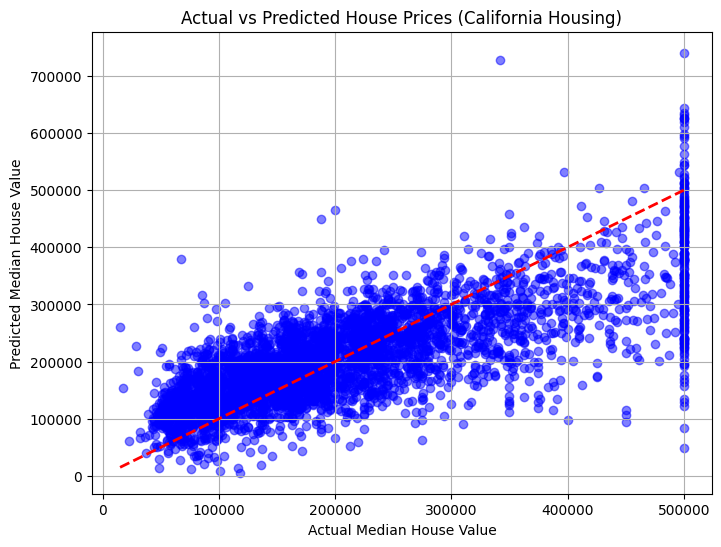

In [165]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted House Prices (California Housing)")
plt.grid(True)
plt.show()

In [166]:
train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, y_pred)

print("Train R²:", train_r2)
print("Test R²:", test_r2)


Train R²: 0.5644379796577141
Test R²: 0.5491233832032217


## **Conclusion**

In this project, I built a House Price Prediction model using Linear Regression on the California Housing dataset. The goal was to predict the median house value based on features like income, number of rooms, and house age.

## **What Was Done:**

- Explored and preprocessed the dataset

- Trained a baseline Linear Regression model

- Evaluated performance using:

   R² Score

   RMSE

   Actual vs Predicted plot

- Identified performance limitations using visual inspection

- Improved the model by:

   Adding more relevant features

   Trying polynomial regression

   Considering feature scaling

